### 1. Import data and revelant packages 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/combined.csv')
df.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range
0,5,ZEHNDER ROAD,Semi-detached,inf,5500000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,524.3,-
1,5,ZEHNDER ROAD,Semi-detached,inf,5000000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,308.0,-
2,5,ZEHNDER ROAD,Semi-detached,inf,4750000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,314.0,-
3,5,NEO PEE TECK LANE,Terrace,inf,2630000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",2,NaN,1.292047,103.768591,159.3,-
4,4,COVE DRIVE,Condominium,84.92,2800000.0,"['FAIRFIELD METHODIST SCHOOL (SECONDARY)', 'QU...",['Telok Blangah Drive Blk 82 (Telok Blangah Ma...,"['NTUC FAIRPRICE CO-OPERATIVE LTD', 'THE QUALI...",0,NaN,1.244208,103.827487,223.0,01-05


### 2. Examine and Explore Data

In [4]:
df.describe()

,district,price,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm
count,132607.000000,1.326070e+05,132607.000000,122560.000000,132607.000000,132607.000000,132607.000000
mean,18.193391,9.562546e+05,0.121479,134.318621,1.358879,103.845187,114.282205
std,5.345945,1.622821e+06,0.362613,47.645843,0.043521,0.068382,88.556745
min,1.000000,4.000000e+04,0.000000,35.428571,1.239641,103.687191,24.000000
25%,16.000000,3.700000e+05,0.000000,122.714286,1.326058,103.793446,84.000000
50%,20.000000,5.000000e+05,0.000000,122.714286,1.355269,103.847709,102.000000
75%,20.000000,9.350000e+05,0.000000,169.428571,1.389063,103.898665,121.000000
max,28.000000,1.090000e+08,2.000000,226.000000,1.460839,103.987293,4836.400000


In [5]:
df.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'price',
       'school', 'hawkercentre', 'supermarkets', 'Bus Stops Nearby',
       'crime_number', 'latitude', 'longitude', 'floor_area_sqm',
       'floor_range'],
      dtype='object')

In [6]:
df.dtypes

district              int64
street               object
propertyType         object
remaining_lease      object
price               float64
school               object
hawkercentre         object
supermarkets         object
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range          object
dtype: object

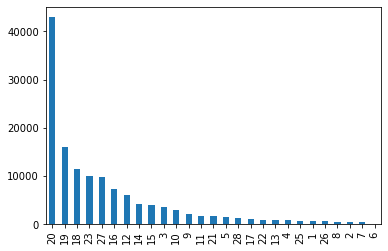

In [7]:
# print(df['district'].value_counts())
df['district'].value_counts().plot(kind='bar')

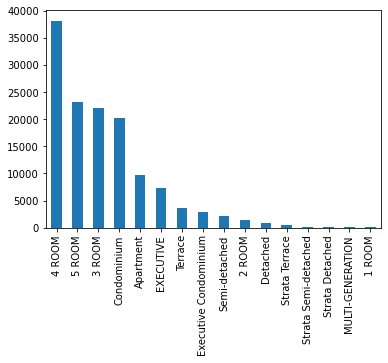

In [8]:
# print(df['propertyType'].value_counts())
df['propertyType'].value_counts().plot(kind='bar')

In [9]:
df['floor_area_sqm'].describe()

count    132607.000000
mean        114.282205
std          88.556745
min          24.000000
25%          84.000000
50%         102.000000
75%         121.000000
max        4836.400000
Name: floor_area_sqm, dtype: float64

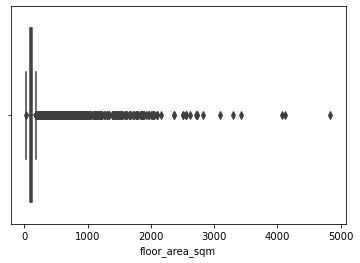

In [10]:
sns.boxplot(x=df['floor_area_sqm'])

In [11]:
df['price'].describe()

count    1.326070e+05
mean     9.562546e+05
std      1.622821e+06
min      4.000000e+04
25%      3.700000e+05
50%      5.000000e+05
75%      9.350000e+05
max      1.090000e+08
Name: price, dtype: float64

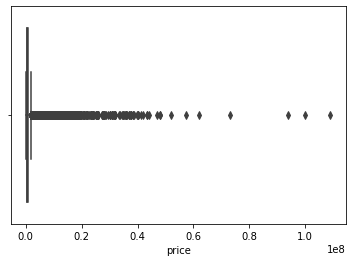

In [12]:
sns.boxplot(x=df['price'])

### 3. Plot charts to see if there are relations between each variable with price

#### 3.1 Categorical Variables
- district 
- street
- propertyType

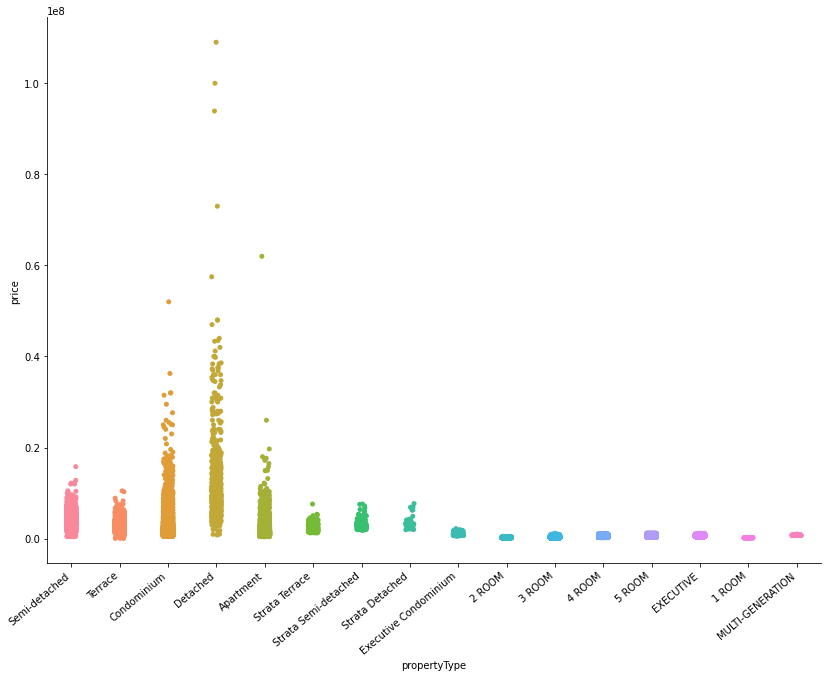

In [13]:
# Relationship between propertyType and price 
import seaborn as sns
ax = sns.catplot(data=df, x='propertyType', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

inf                   17027
94 years 09 months      729
94 years 11 months      705
94 years 10 months      703
94 years 08 months      685
                      ...  
821.83                    1
97 years 07 months        1
26.75                     1
64.83                     1
40.92                     1
Name: remaining_lease, Length: 1560, dtype: int64

In [14]:
categorical_features = [feature for feature in df.columns if
                       df[feature].dtypes == 'O']
print(categorical_features)

['street', 'propertyType', 'remaining_lease', 'school', 'hawkercentre', 'supermarkets', 'floor_range']


In [7]:
categorical_features.remove('floor_range')
categorical_features.remove('remaining_lease')

In [8]:
#ax = sns.catplot(data=df, x='street', y='price', height=8.27, aspect=11.7/8.27)
#ax.set_xticklabels(rotation=40, ha="right")

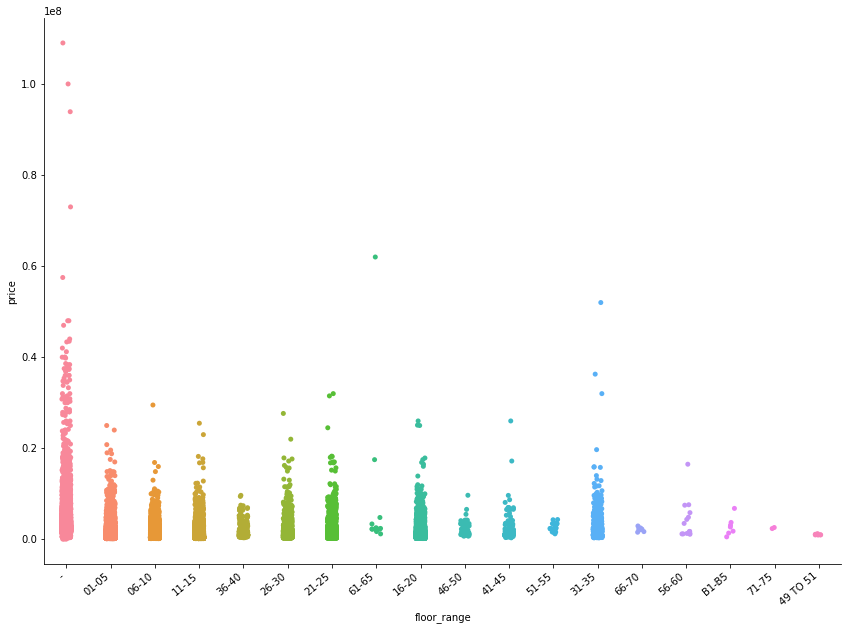

In [9]:
ax = sns.catplot(data=df, x='floor_range', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

#### 3.2 Multicollinearity

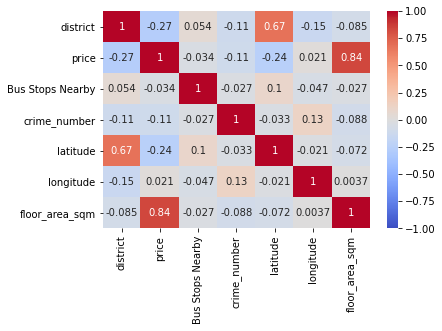

In [10]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### 3.3 Common Factors Affecting Price 

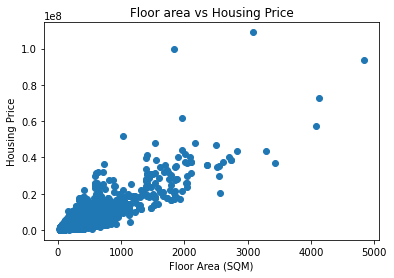

In [11]:
# Price and Square Meters of Flat
plt.scatter(df.floor_area_sqm, df.price)
plt.xlabel('Floor Area (SQM)')
plt.ylabel('Housing Price')
plt.title('Floor area vs Housing Price')
plt.show()

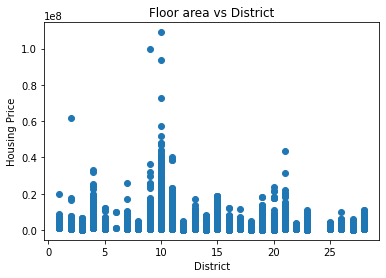

In [17]:
# Price and district of Flat
plt.scatter(df.district, df.price)
plt.xlabel('District')
plt.ylabel('Housing Price')
plt.title('Floor area vs District')
plt.show()

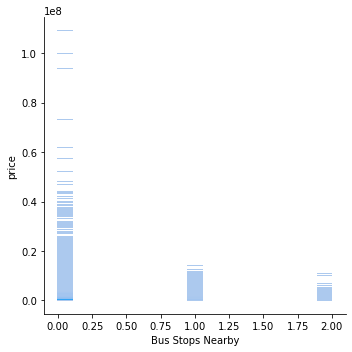

In [14]:
# Price and bus stops nearby
sns.displot(df, x="Bus Stops Nearby", y="price")

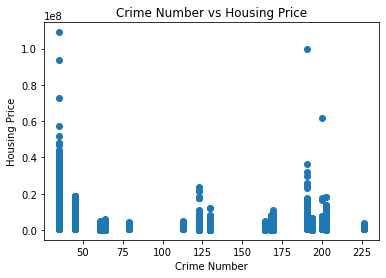

In [18]:
# Price and Crime Number
plt.scatter(df.crime_number, df.price)
plt.xlabel('Crime Number')
plt.ylabel('Housing Price')
plt.title('Crime Number vs Housing Price')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


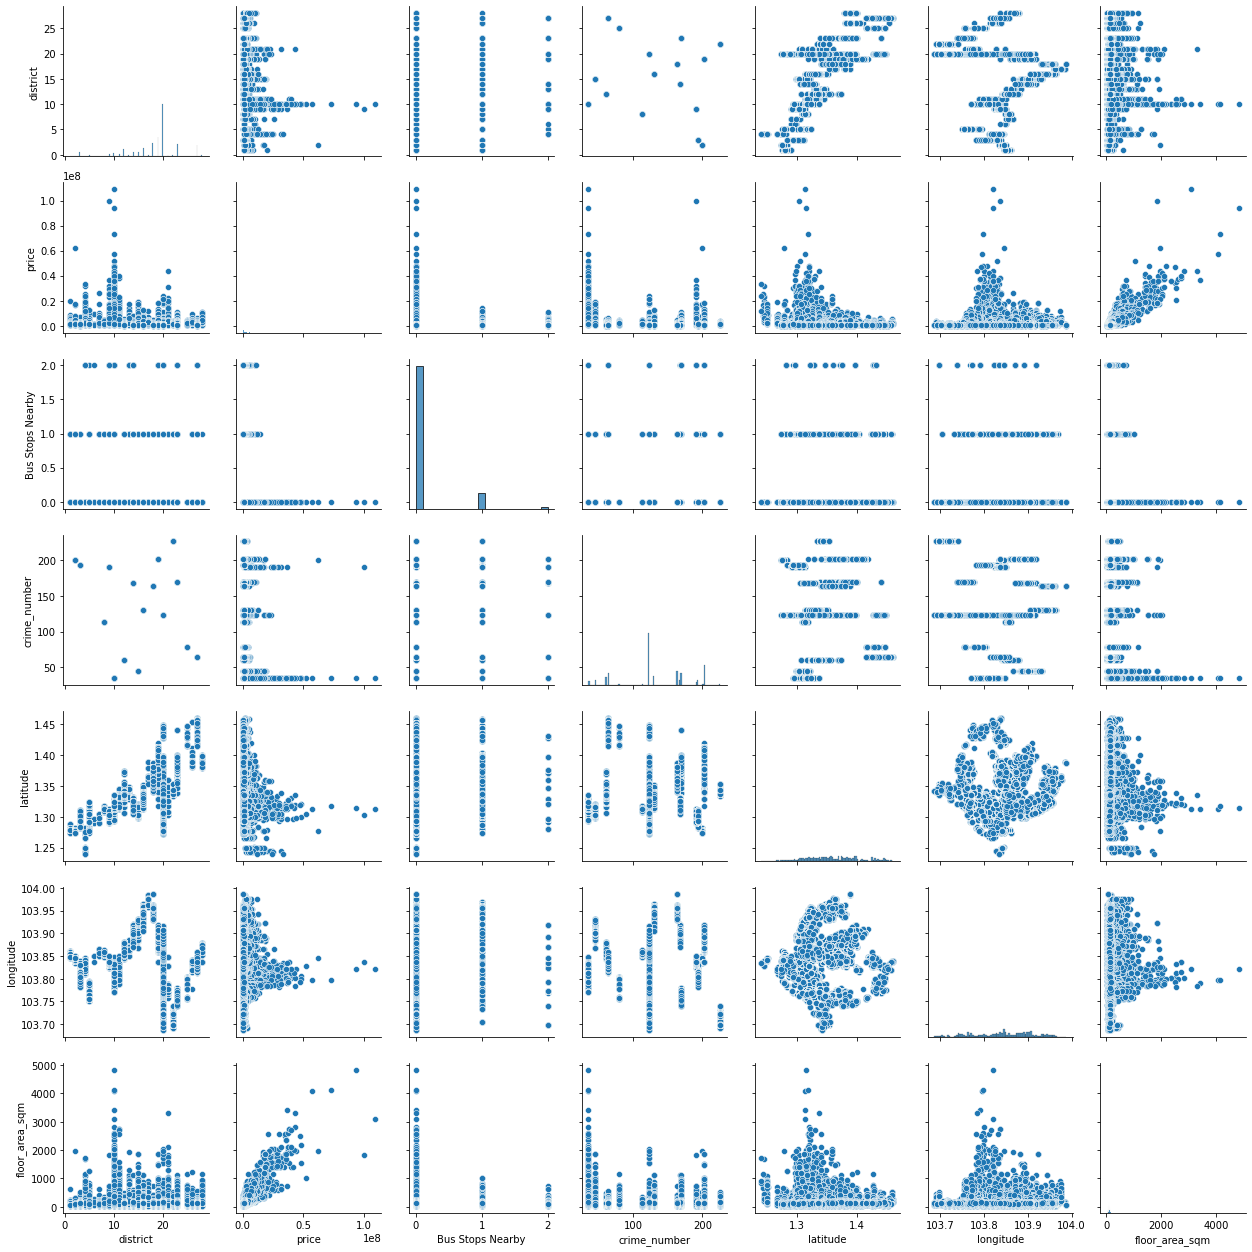

In [21]:
sns.pairplot(df, size=2.5)
plt.tight_layout()

### 4. Editing Data

### 5. Linear Regression